Models can take decisions with social impact. For example, regarding money.

Modelers should ensure that models does not discriminate by capturing historical bias in the data.

1. See data and potential discriminant features
2. Train XGBoost
3. Check importances. Global importances are confused
4. SHAP importances
5. Example analysis
6. SHAP dependence plot?

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.adult import AdultIncome

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


------ Features -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB
None

------ Target distribution ----
AxesSubplot(0.125,0.125;0.775x0.755)


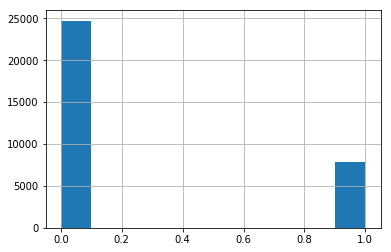

In [4]:
adult_income = AdultIncome()
adult_income

In [130]:
adult_income.X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
adult_income.fit()

XGBClassifier(base_score=0.2408095574460244, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.79341343013496,
       gamma=0.13333827473047385, learning_rate=0.1, max_delta_step=0,
       max_depth=9, max_features='sqrt', min_child_weight=10, missing=None,
       monotone_constraints='(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)',
       n_estimators=79, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=666, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=3.152659099604642, seed=None,
       silent=True, subsample=0.8824766050391741)

In [10]:
test_probas = adult_income.fitted_model.predict_proba(adult_income.X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(adult_income.y_test, test_probas)

0.9263953107380427

In [11]:
test_predictions = adult_income.fitted_model.predict(adult_income.X_test)
from sklearn.metrics import classification_report
print(classification_report(adult_income.y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88     12435
           1       0.60      0.86      0.71      3846

   micro avg       0.83      0.83      0.83     16281
   macro avg       0.78      0.84      0.80     16281
weighted avg       0.87      0.83      0.84     16281



In [12]:
import xgboost
predictions = adult_income.fitted_model.get_booster().predict(xgboost.DMatrix(adult_income.X_test))
predictions_contribs = adult_income.fitted_model.get_booster().predict(xgboost.DMatrix(adult_income.X_test), pred_contribs=True)

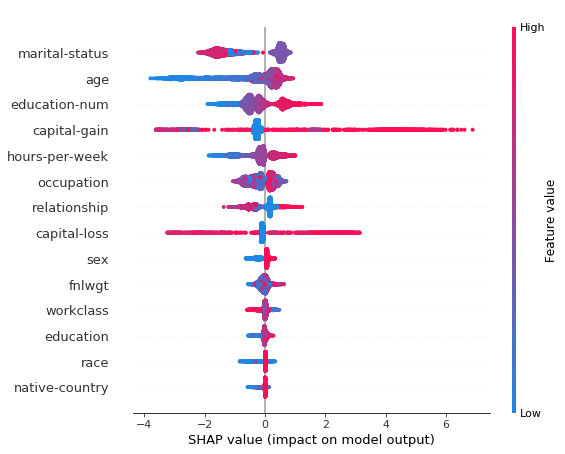

In [20]:
import shap
shap.summary_plot(predictions_contribs[:, :-1], adult_income.X_test)

In [136]:
shap.initjs()
shap.force_plot(predictions_contribs[237,:], adult_income.X_test.iloc[237,:])

In [ ]:
import shap
shap.dependence_plot('race', 
                     predictions_contribs[:, :-1], 
                     adult_income.X_test, 
                     display_features=adult_income.test,
                    interaction_index=adult_income.X_test.columns.get_loc('sex'))